Nama : Andrew 

NIM : 2540119601

Kelas : LA09

Mata Kuliah : Deep Learning

Jurusan : Data Science

##### Libary

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import operator
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

##### Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/UTS-DeepLearning-Data/insurance.csv')

Mounted at /content/drive


In [ ]:
df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


##### 1A. [LO 3, LO 4, 5 poin] Dataset yang diberikan memiliki beberapa problem, lakukan praproses data untuk menyelesaikan problem dari data tersebut. Sebutkan problem apa saja yang kalian temukan dari data yang diberikan, berikan penjelasan mengenai pendekatan apa yang kalian gunakan dan kenapa memilih pendekatan yang dipilih?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


Dari sini dapat diketahui semua data sudah dalam format numerik. Sehingga tidak perlu dipindahkan kedapam category untuk memudahkan train data. Selain itu terdapat 2 data yang berbentuk desimal. 
Pada data ini juga terdapat 9 kolom dengan total data 1338 row.

In [ ]:
print(df[df.duplicated()].shape)

(0, 9)


Dari sini dapat diketahui tidak ada data yang redundant satu dengan yang lainnya

In [ ]:
 df.isna().sum()

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

Dari missing value tidak di dapatkan sama sekali missing value pada dataset ini

###### Mendekteksi Outlier

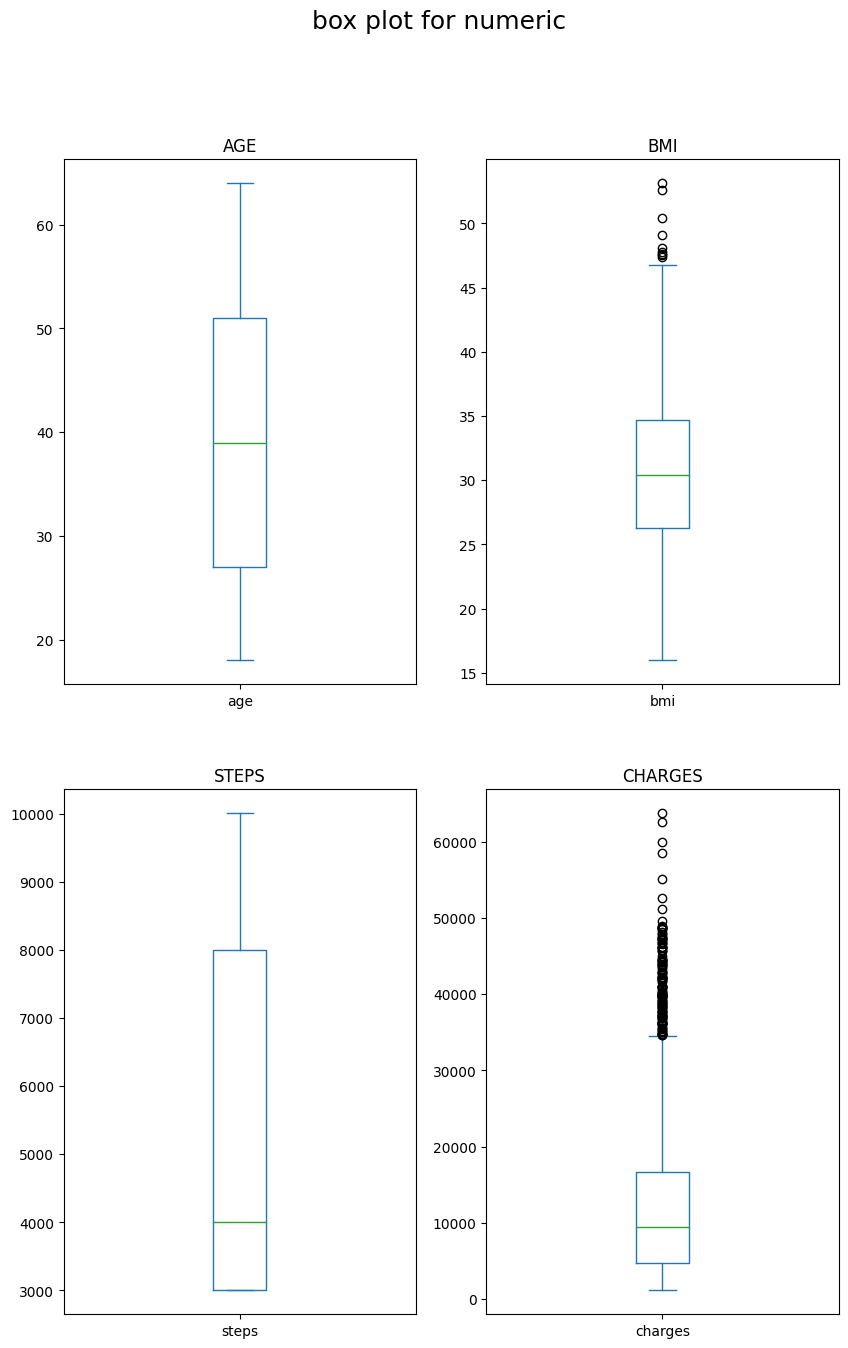

In [ ]:
data = ["age","bmi","steps","charges"]
plt.figure(figsize=(10, 15))
plt.subplots_adjust(hspace=0.2)
plt.suptitle("box plot for numeric", fontsize=18)

for n,column in enumerate(data):
  ax = plt.subplot(2, 2, n + 1)
  df[column].plot(kind='box')
  ax.set_title(column.upper())
  ax.set_xlabel("")

Dari sini dapat dilihat visualisasi terhadap 2 kolom yang memiliki outlier, yaitu BMI dan charges. 

Dari sini dapat diketahui kolom age tidak ada outlier dan steps

Menghapus beberapa outlier di dalam kolom bmi akan menjadi cara terbaik untuk menghapus noise dibanding dengan menghapus outlier di charges, karena charge sendiri memiliki variasi harga terngantung dari asuransi yang diberikan.

In [ ]:
# checking how may outlier
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

x = (df['bmi'] >= Q1 - 1.5 * IQR) & (df['bmi'] <= Q3 + 1.5 *IQR)
df1 = df.copy()
df1 = df1.loc[x]
df1

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,4008,3,0,1,10600.54830,0
1334,18,0,31.920,3003,0,0,0,2205.98080,1
1335,18,0,36.850,3008,0,0,2,1629.83350,1
1336,21,0,25.800,8009,0,0,3,2007.94500,0


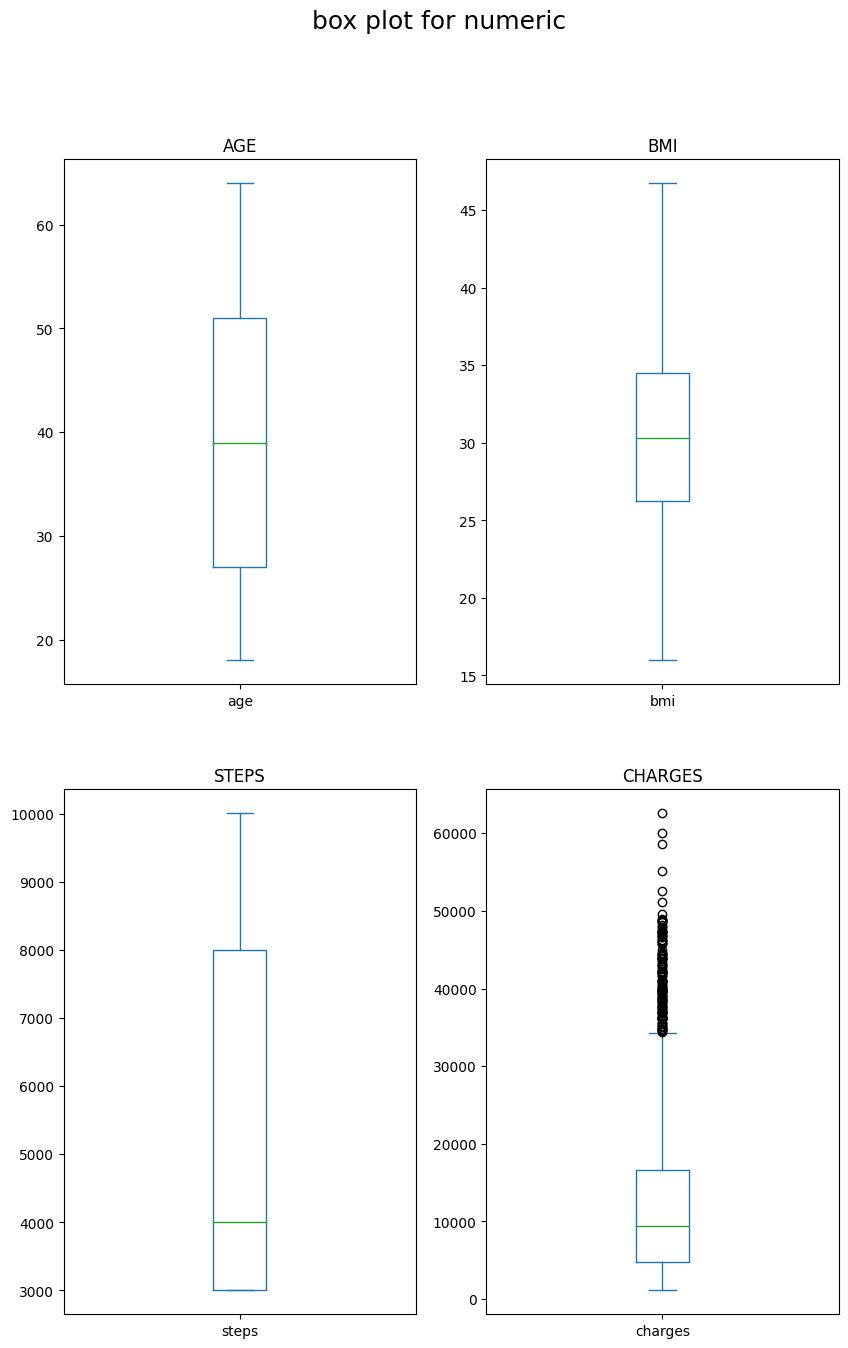

In [ ]:
data = ["age","bmi","steps","charges"]
plt.figure(figsize=(10, 15))
plt.subplots_adjust(hspace=0.2)
plt.suptitle("box plot for numeric", fontsize=18)

for n,column in enumerate(data):
  ax = plt.subplot(2, 2, n + 1)
  df1[column].plot(kind='box')
  ax.set_title(column.upper())
  ax.set_xlabel("")

Untuk feature engeninering, yaitu scaler akan dilanjutkann pada saat split data

##### 1B. [LO 3, LO 4, 5 poin] Lakukan eksplorasi data terlebih dahulu untuk memahami permasalahan yang dihadapi terlebih dahulu. Selanjutnya pisahkan dataset menjadi train, test dan validation set dengan ketentuan (80 train, 10 val, 10 test)

Pada soal ini saya menggunakan dataframe df untuk melakukan eksplorasi dan untuk memisahkan dataset akan menggunakan df1 yang tidak ada outlier.

In [ ]:
df

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,4008,3,0,1,10600.54830,0
1334,18,0,31.920,3003,0,0,0,2205.98080,1
1335,18,0,36.850,3008,0,0,2,1629.83350,1
1336,21,0,25.800,8009,0,0,3,2007.94500,0


In [ ]:
# check the dimmension
df.shape

(1338, 9)

Terdapat total data 1329 dengan 9 kolom

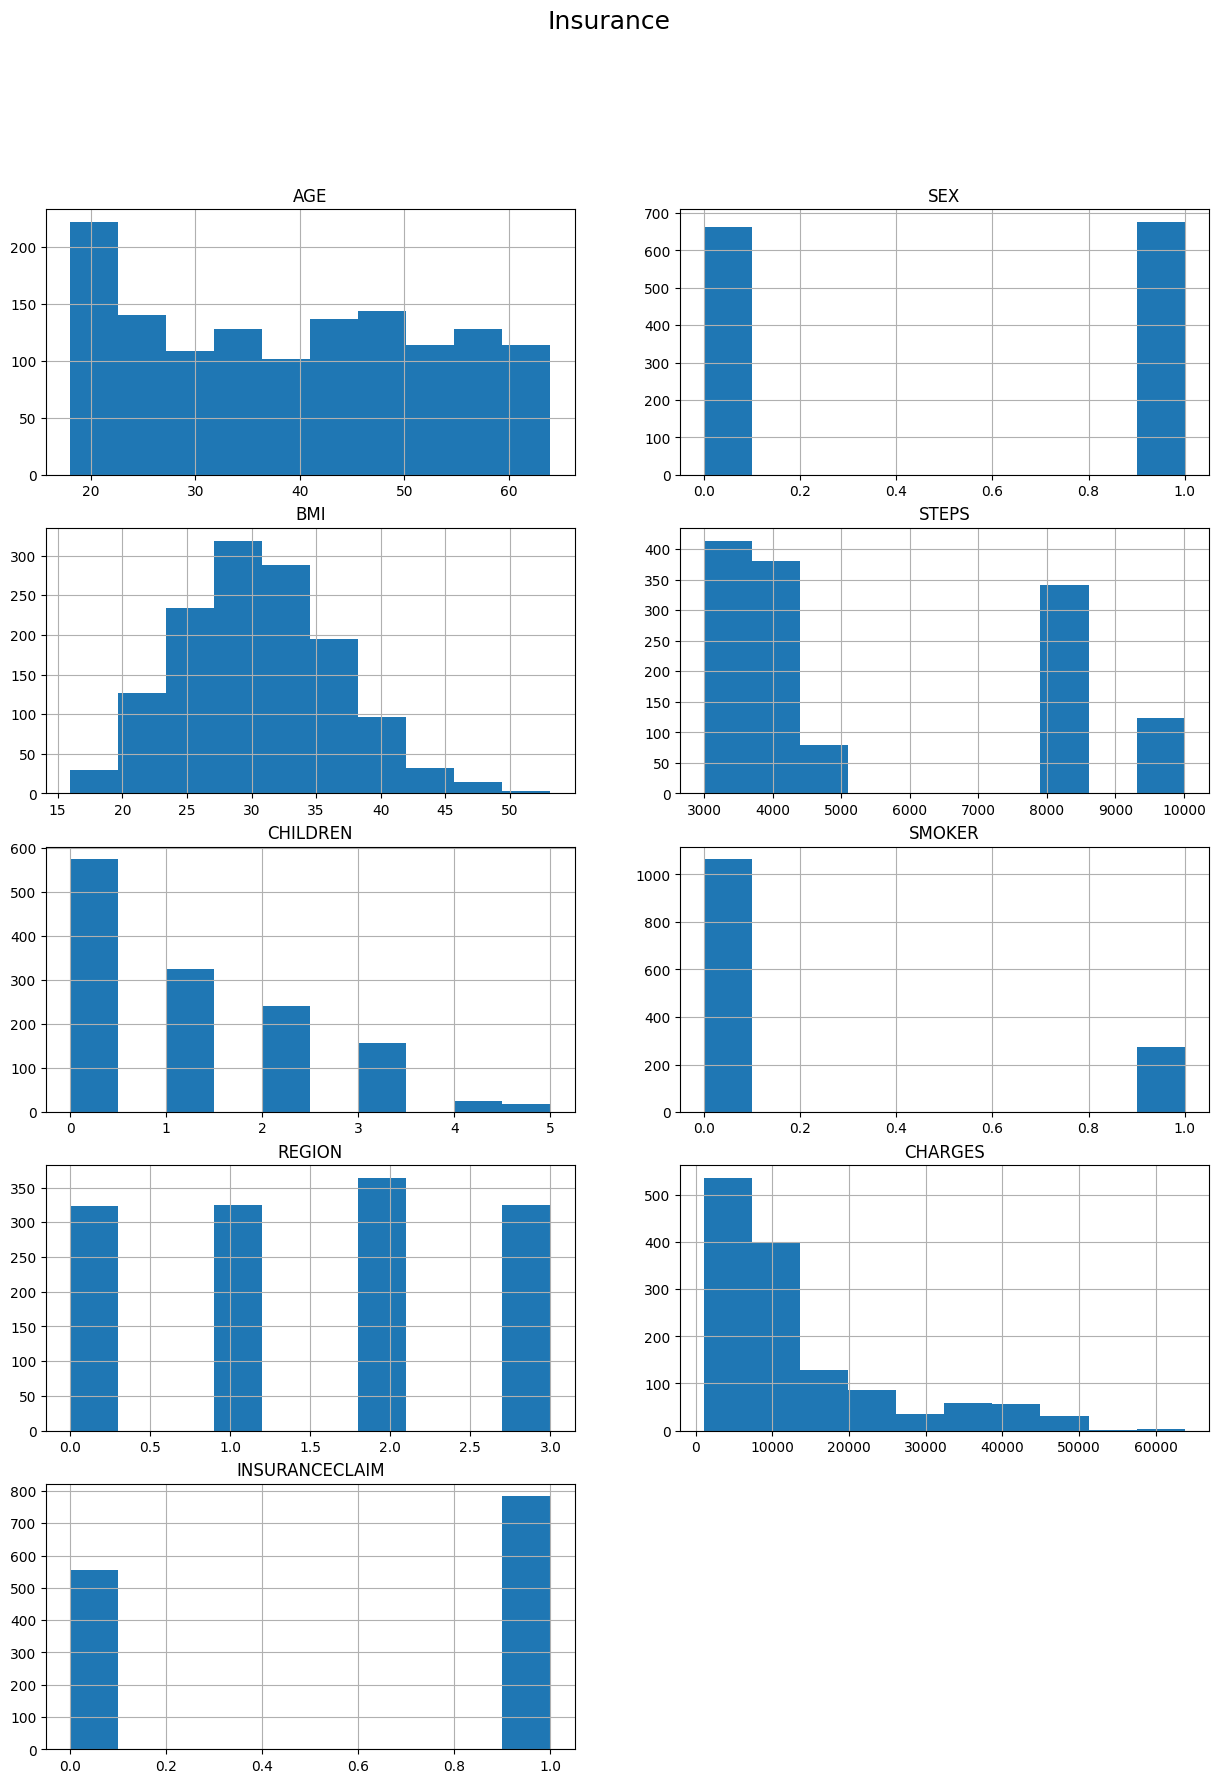

In [ ]:
# histogram plot
plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.2)
plt.suptitle("Insurance", fontsize=18)

for n,column in enumerate(df.columns):
  ax = plt.subplot(5, 2, n + 1)
  df[column].hist(ax=ax)
  ax.set_title(column.upper())
  ax.set_xlabel("")

Dari sini dapat diketahui yang mana merupakan categorical dan yang bukan dari penyebaran data yang diberikan. Dari sini juga sekilas dapat dilhat penyebaran data tidaklah berbentuk normalisasi.

In [ ]:
df.corr()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,-0.167957,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,-0.039470,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,-0.681149,0.012759,0.003750,0.157566,0.198341,0.384198
steps,-0.167957,-0.039470,-0.681149,1.000000,0.055346,-0.267845,-0.076483,-0.305570,-0.419514
children,0.042469,0.017163,0.012759,0.055346,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,-0.267845,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,-0.076483,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,-0.305570,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.419514,-0.409526,0.333261,0.020891,0.309418,1.000000


Untuk lebih jelasnya mana yang besar dapat dilihat dengan menggunakan function di bawah berikut

In [ ]:
individual_features_df = []
for i in range(0, len(df.columns) - 1): 
    tmpDf = df[[df.columns[i], 'insuranceclaim']]
    tmpDf = tmpDf[tmpDf[df.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['insuranceclaim'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

            age: 0.1137225624127475
            sex:             nan
          steps: -0.4195136142781132
       children: -0.22032635293122127
            bmi: 0.3841978190456
         smoker:             nan
         region: 0.049960683441651686
        charges: 0.30941820306029294


Dari sini dapat diketahui beberapa fitur yang memiliki korelasi terhadap insurance untuk yang tetinggi dapat dilihat dari fungsi dibawah. 

In [ ]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.3]
print("Terdapat {} feature yang memiliki korelasi tinggi dengan insurance claim:\n{}".format(len(golden_features_list), golden_features_list))

Terdapat 3 feature yang memiliki korelasi tinggi dengan insurance claim:
['steps', 'bmi', 'charges']


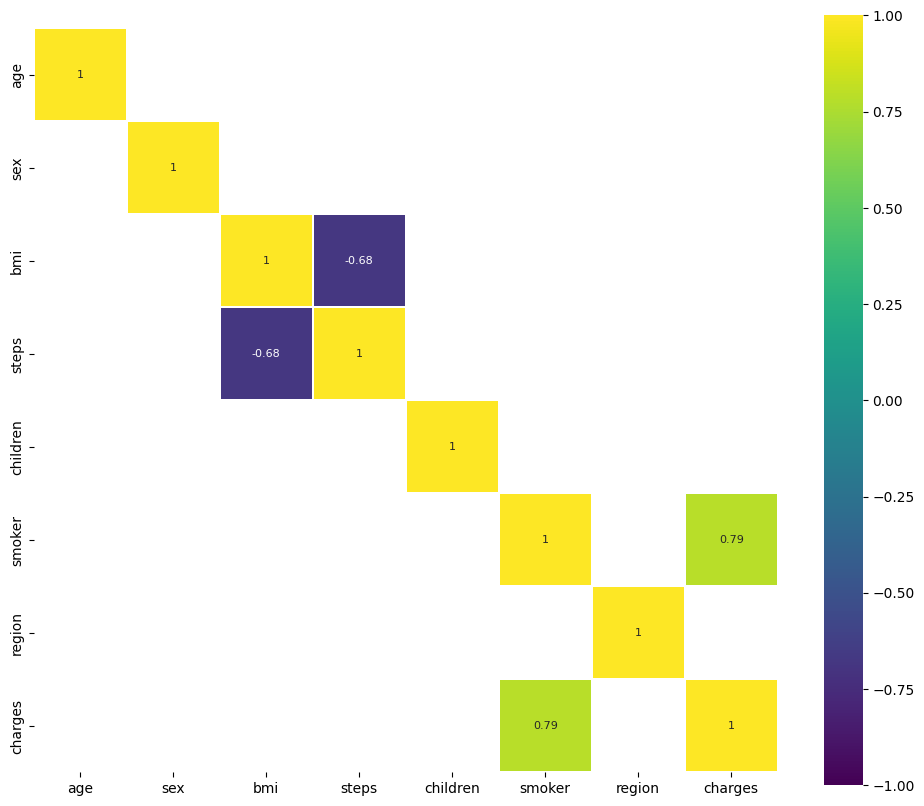

In [ ]:
corr = df.drop('insuranceclaim', axis=1).corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Dari korelasi fitur-fitur dapat diketahui hanya terdapat 2 relasi yang tinggi, yang mana pertama ada smoker dengan charges dan yang kedua ada steps dengan BMI.
Dengan score, yaitu 0.79 dan -0.68.


Setelah melihat dan mengeksplor lebih dalam dataset ini. Setelah ini dataset akan dibagi menjadi train,validation, test.

In [ ]:
#  Define X and Y.
# X is the feature to determine target (Y)
X = df1.drop(['insuranceclaim'],axis=1)
y = df1.insuranceclaim

Sebelum di bagi data akan di preprocessing lagi untuk mernomalisasi dari data X

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X.shape

(1329, 8)

Setelah itu data akan dibagi menjadi ratio 80% train, 10% validation, dan 10% test

In [ ]:
x_train, x_val_test, y_train, y_val_test = train_test_split(X,y,test_size=0.2) 
x_train.shape, x_val_test.shape, y_train.shape, y_val_test.shape

((1063, 8), (266, 8), (1063,), (266,))

Setelah di bagi 90% train dan 10% test. Train akan displit lagi untuk mendapatkan validasi

In [ ]:
x_test, x_val, y_test, y_val = train_test_split(x_val_test, y_val_test,test_size=0.5) 
x_test.shape, x_val.shape, y_test.shape, y_val.shape

((133, 8), (133, 8), (133,), (133,))

Dengan begini data sudah terbagi mejadi bentuk yang diingankan

##### 1C. [LO 3, LO 4, 5 poin] Buatlah arsitektur baseline dengan n nodes input layer, 2 buah hidden layer dengan banyak 2 × n nodes awal dan layer akhir banyak kelas nya (n, 2 × n, 2 × n, num_class). Keterangan: n adalah banyak input dan num_class adalah banyak kelas. Activation function untuk tiap hidden layer menggunakan ReLU


In [ ]:
pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-9iz1_onc
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-9iz1_onc
  Resolved https://github.com/tensorflow/docs to commit abfbe6e54864baa38dbb985b984acd304be610d4
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=183273 sha256=101583b1689bf230d0dc601e507ad6cdd1c291124a9f90ac709c06bfc1111d25
  Stored in directory: /tmp/pip-ephem-wheel-cache-n7rjgzxb/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


installing tensorflow docs

In [ ]:
# Libary that used ini modeling

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
from keras.utils.np_utils import to_categorical

Pada metode ini akan menggunakan library dari tensor, yaitu keras untuk membentuk ANN

In [ ]:
y_train_onehot = to_categorical(y_train, num_classes=2)
y_val_OHE = to_categorical(y_val, num_classes=2)
y_test_OHE = to_categorical(y_test, num_classes=2)

Merubah kolom target menjadi One hot enconder agar dapat dibaca oleh loss function categorical crossentrophy.

In [ ]:
x_train = np.asarray(x_train)
y_train_onehot = np.asarray(y_train_onehot)

Merubah ke array guna menhindari error.

In [ ]:
# Initial the model
FirstModel = keras.Sequential()

Pada tahap ini model sudah dibentuk dengan nama model

In [ ]:
# Add input layer, hidden layer, and output layer
# Hidden Layer 1
FirstModel.add(layers.Dense(16,input_shape=(8,), activation="relu"))
# Hidden Layer 2
FirstModel.add(layers.Dense(16,activation='relu'))
# Output layer
FirstModel.add(layers.Dense(2))

Dengan begitu terlalu terbuat model dengan susunan model (8,16,16,2)

In [ ]:
FirstModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 450
Trainable params: 450
Non-trainable params: 0
_________________________________________________________________


Dengan melakukan summary dapat diketahui berapa layer telah dibuat dengan hidden layer

In [ ]:
# Compile de model so have the output of accuracy
FirstModel.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'])

Setelah itu dapat melakukan fitting model untuk mendapatkan hasil akurasi yang akan diberikan. Pada kasus ini akan menggunakan 40 epoch

In [ ]:
epochs = 40

history = FirstModel.fit(
  x_train, y_train_onehot, validation_data= (x_val, y_val_OHE),
  epochs = epochs, verbose = 1,
  callbacks = [tfdocs.modeling.EpochDots()])

Epoch 1/40
25/34 [=====================>........] - ETA: 0s - loss: 4.1904 - accuracy: 0.4150 
Epoch: 0, accuracy:0.4026,  loss:4.1092,  val_accuracy:0.3534,  val_loss:3.0870,  
34/34 [==============================] - 2s 9ms/step - loss: 4.1092 - accuracy: 0.4026 - val_loss: 3.0870 - val_accuracy: 0.3534
Epoch 2/40
34/34 [==============================] - 0s 3ms/step - loss: 3.2397 - accuracy: 0.3866 - val_loss: 2.7225 - val_accuracy: 0.3308
Epoch 3/40
34/34 [==============================] - 0s 4ms/step - loss: 2.8029 - accuracy: 0.3810 - val_loss: 2.2224 - val_accuracy: 0.3835
Epoch 4/40
34/34 [==============================] - 0s 5ms/step - loss: 2.3363 - accuracy: 0.3678 - val_loss: 2.3179 - val_accuracy: 0.3910
Epoch 5/40
34/34 [==============================] - 0s 5ms/step - loss: 2.2565 - accuracy: 0.3650 - val_loss: 1.7335 - val_accuracy: 0.3835
Epoch 6/40
34/34 [==============================] - 0s 4ms/step - loss: 1.9424 - accuracy: 0.3622 - val_loss: 1.8213 - val_accuracy: 

Dari sini dengan menggunakan epochs 100 dan dengan batch size di dapat hasil akurasi yang didapatkan 45% dan val akurasi 49%.

In [ ]:
FirstModel.evaluate(x_test, y_test_OHE)[1]

5/5 [==============================] - 0s 5ms/step - loss: 1.7342 - accuracy: 0.4135


0.4135338366031647

Hasil yang didapatkan dengan melakukan evaluasi dengan test model didapatkan hasil 0.47%

Untuk melihat lebih jelas kembali dapat melihat dari plot antar train dengan validation

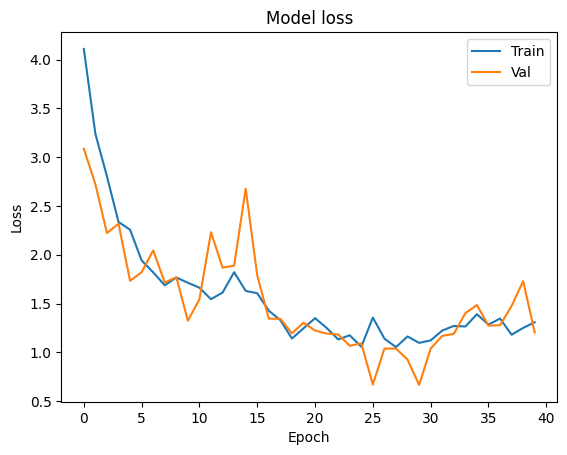

In [ ]:
# plotting model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

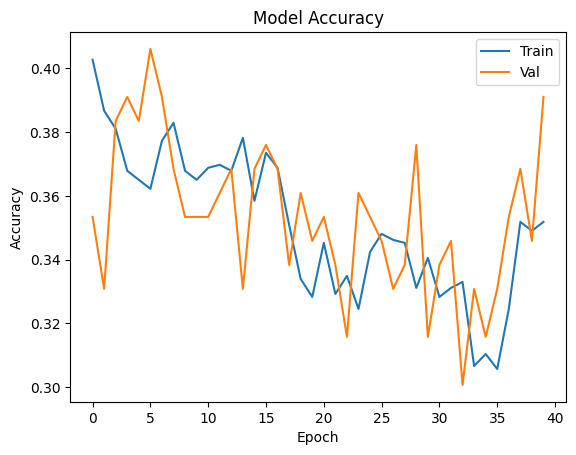

In [ ]:
# plotting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Dari model yang dipatkan dapat diketahui pembentukan plot yang dihasilkan sangatlah overfitting dapat terlihat pada plot model loss dan model accuracy.

Selain itu akurasi yang dibentuk 35% dan untuk validasi akurasinya terdapat di 45%. Sedangkan pada saat dibandingkan dengan test mendapatkan hasil 41%.

##### 1D. [LO 3, LO 4, 5 poin] Lakukan evaluasi unjuk kerja kedua arsitektur di atas pada test set dengan mencari nilai accuracy, precision, recall dan F1-Score. Dan berikan penjelasan mengenai hasilnya dengan rinci.

Pada nomor ini akan terdapat beberapa model yang dibuat guna untuk menbandingkan yang mana yang paling efektif

In [ ]:
Model_1A = keras.Sequential()

Inisialisaikan model 1A dan akan ditambahkan arsitektur

In [ ]:
# Add input layer, hidden layer, and output layer
# Hidden Layer 1
Model_1A.add(layers.Dense(16,input_shape=(8,), activation="relu"))
# Hidden Layer 2
Model_1A.add(layers.Dense(16,activation='relu'))
# Output layer
Model_1A.add(layers.Dense(2, activation='sigmoid'))

Pada pemodelan ini model yang digunakan terdapat penambahan activation fuction pada output, yaitu sigmoid yang berfungsi dengan baik dalam classification model. Selain itu tidak ada penambahan atau pengurangan layer pada model 1.

In [ ]:
Model_1A.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 2)                 34        
                                                                 
Total params: 450
Trainable params: 450
Non-trainable params: 0
_________________________________________________________________


Untuk model petama ini akan menggunakan optimzer adam dengan learning rate 0.01

In [ ]:
# compiling the model
Model_1A.compile(loss = 'categorical_crossentropy',optimizer=tf.optimizers.Adam(learning_rate=0.01),metrics = ['accuracy'])

In [ ]:
epochs = 100

history1 = Model_1A.fit(
  x_train, y_train_onehot, validation_data= (x_val, y_val_OHE),
  epochs = epochs, verbose = 1, batch_size=30,
  callbacks = [tfdocs.modeling.EpochDots()])

Epoch 1/100
22/36 [=================>............] - ETA: 0s - loss: 0.4775 - accuracy: 0.7848
Epoch: 0, accuracy:0.8128,  loss:0.4350,  val_accuracy:0.8872,  val_loss:0.2684,  
36/36 [==============================] - 2s 15ms/step - loss: 0.4350 - accuracy: 0.8128 - val_loss: 0.2684 - val_accuracy: 0.8872
Epoch 2/100
36/36 [==============================] - 0s 6ms/step - loss: 0.2940 - accuracy: 0.8702 - val_loss: 0.2551 - val_accuracy: 0.9023
Epoch 3/100
36/36 [==============================] - 0s 8ms/step - loss: 0.2516 - accuracy: 0.8965 - val_loss: 0.2365 - val_accuracy: 0.8872
Epoch 4/100
36/36 [==============================] - 0s 7ms/step - loss: 0.2329 - accuracy: 0.9050 - val_loss: 0.2306 - val_accuracy: 0.9098
Epoch 5/100
36/36 [==============================] - 0s 12ms/step - loss: 0.2111 - accuracy: 0.9172 - val_loss: 0.1857 - val_accuracy: 0.9173
Epoch 6/100
36/36 [==============================] - 0s 6ms/step - loss: 0.1939 - accuracy: 0.9163 - val_loss: 0.1660 - val_acc

In [ ]:
Model_1A.evaluate(x_test, y_test_OHE)[1]

5/5 [==============================] - 0s 3ms/step - loss: 0.1771 - accuracy: 0.9549


0.9548872113227844

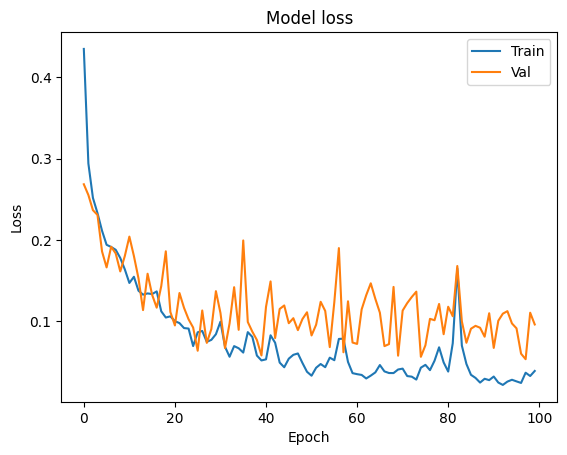

In [ ]:
# plotting model loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

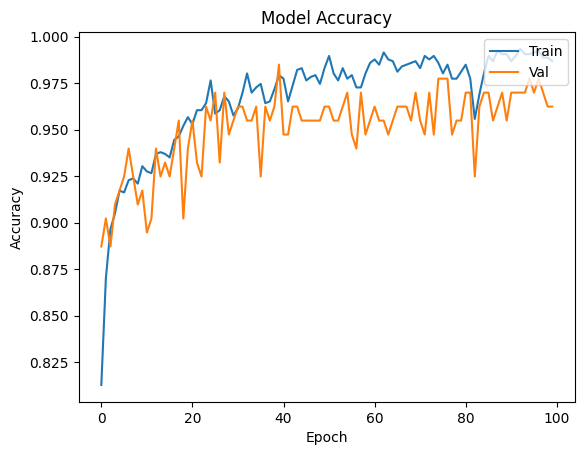

In [ ]:
# plotting accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Dari sini model 1A dengan menggunakan Adam optimizer mendapatkan hasil yang sangat baik terlihat dari akurasi yang diberikan. Hal ini dapat dilihat dari  akurasi model dapat nilai diatas 99% dan evaluasi terdapat di nilai diatas 96%.
Pada saat dibandingkan dengan test akurasi yang didapatkan 94%.

Plot yang dibentuk baik itu dari model loss dan akurasi membentukkan spike di beberapa tenpat. Hal ini yang menentukan suatu model overfitting. Sehingga diperlukan revisi dalam tuning. 

Membentuk model 1B yang mana akan menganti model yang dibuat dengan menambahkan learning rate, karena dengan menurunkan learning rate dapat membantu menurunkan overfitting.

In [ ]:
Model_1B = keras.Sequential()

In [ ]:
# Add input layer, hidden layer, and output layer
# Hidden Layer 1
Model_1B.add(layers.Dense(16,input_shape=(8,), activation="relu"))
# Hidden Layer 2
Model_1B.add(layers.Dense(16,activation='relu'))
# Output layer
Model_1B.add(layers.Dense(2, activation='sigmoid'))

In [ ]:
Model_1B.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                144       
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 2)                 34        
                                                                 
Total params: 450
Trainable params: 450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compiling the model
Model_1B.compile(loss = 'categorical_crossentropy',optimizer=tf.optimizers.Adam(learning_rate=0.001),metrics = ['accuracy'])

In [ ]:
epochs = 100

history2 = Model_1B.fit(
  x_train, y_train_onehot, validation_data= (x_val, y_val_OHE),
  epochs = epochs, verbose = 1, batch_size=30,
  callbacks = [tfdocs.modeling.EpochDots()])

Epoch 1/100
32/36 [=========================>....] - ETA: 0s - loss: 0.6129 - accuracy: 0.6812
Epoch: 0, accuracy:0.6858,  loss:0.6081,  val_accuracy:0.7970,  val_loss:0.5465,  
36/36 [==============================] - 1s 11ms/step - loss: 0.6081 - accuracy: 0.6858 - val_loss: 0.5465 - val_accuracy: 0.7970
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: 0.5280 - accuracy: 0.7648 - val_loss: 0.4781 - val_accuracy: 0.8045
Epoch 3/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4718 - accuracy: 0.7968 - val_loss: 0.4224 - val_accuracy: 0.8421
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 0.4326 - accuracy: 0.8184 - val_loss: 0.3770 - val_accuracy: 0.8421
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4033 - accuracy: 0.8297 - val_loss: 0.3435 - val_accuracy: 0.8571
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 0.3818 - accuracy: 0.8542 - val_loss: 0.3165 - val_accu

In [ ]:
Model_1B.evaluate(x_test, y_test_OHE)[1]

5/5 [==============================] - 0s 3ms/step - loss: 0.1384 - accuracy: 0.9549


0.9548872113227844

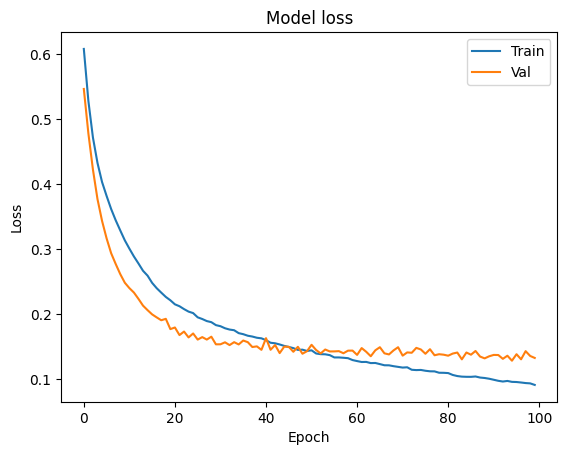

In [ ]:
# plotting model loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

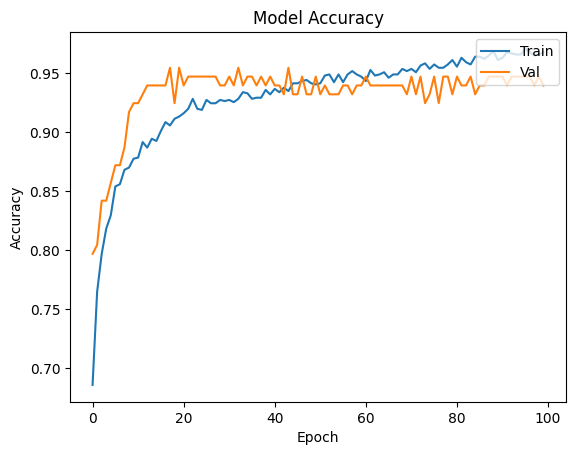

In [ ]:
# plotting accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Dari model kedua ini dikarenakan learning rate dari Adam tetap membawakan hasil overfit ke dalam model walaupun tidak banyak. Maka dari itu diperlukan pergantian optimizer menjadi SGD dan melakukan beberapa adjust terhadap struktur ANN.

Pada model 2 ini didapatkan akurasi 95% dan untuk validation akurasi 91%. Sedangkan pada saat dibandingkan dengan test menghasilkan akurasi 91%.



Membentuk model 1C yang mana akan menganti model yang dibuat dengan hidden layer dan melakukan adijust terhadap jumlah neuron

In [ ]:
Model_1C = keras.Sequential()

In [ ]:
# Add input layer, hidden layer, and output layer
# Hidden Layer 1
Model_1C.add(layers.Dense(14,input_shape=(8,), activation="relu"))
# Hidden Layer 2
Model_1C.add(layers.Dense(18,activation='relu'))
# Output layer
Model_1C.add(layers.Dense(2, activation='sigmoid'))

Model yang digunkanan masih tetap sama

In [ ]:
Model_1C.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 14)                126       
                                                                 
 dense_22 (Dense)            (None, 18)                270       
                                                                 
 dense_23 (Dense)            (None, 2)                 38        
                                                                 
Total params: 434
Trainable params: 434
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compiling the model
Model_1C.compile(loss = 'categorical_crossentropy',optimizer=tf.optimizers.SGD(learning_rate=0.01),metrics = ['accuracy'])

In [ ]:
epochs = 100

history3 = Model_1C.fit(
  x_train, y_train_onehot, validation_data= (x_val, y_val_OHE),
  epochs = epochs, verbose = 1, batch_size=20,
  callbacks = [tfdocs.modeling.EpochDots()])

Epoch 1/100
30/54 [===============>..............] - ETA: 0s - loss: 0.7308 - accuracy: 0.5650 
Epoch: 0, accuracy:0.5851,  loss:0.7008,  val_accuracy:0.6090,  val_loss:0.6651,  
54/54 [==============================] - 1s 6ms/step - loss: 0.7008 - accuracy: 0.5851 - val_loss: 0.6651 - val_accuracy: 0.6090
Epoch 2/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6432 - accuracy: 0.6529 - val_loss: 0.6186 - val_accuracy: 0.6767
Epoch 3/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6012 - accuracy: 0.7244 - val_loss: 0.5782 - val_accuracy: 0.7218
Epoch 4/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5638 - accuracy: 0.7516 - val_loss: 0.5425 - val_accuracy: 0.7519
Epoch 5/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5319 - accuracy: 0.7648 - val_loss: 0.5137 - val_accuracy: 0.7594
Epoch 6/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5055 - accuracy: 0.7752 - val_loss: 0.4868 - val_accu

In [ ]:
Model_1C.evaluate(x_test, y_test_OHE)[1]

5/5 [==============================] - 0s 4ms/step - loss: 0.2815 - accuracy: 0.9323


0.932330846786499

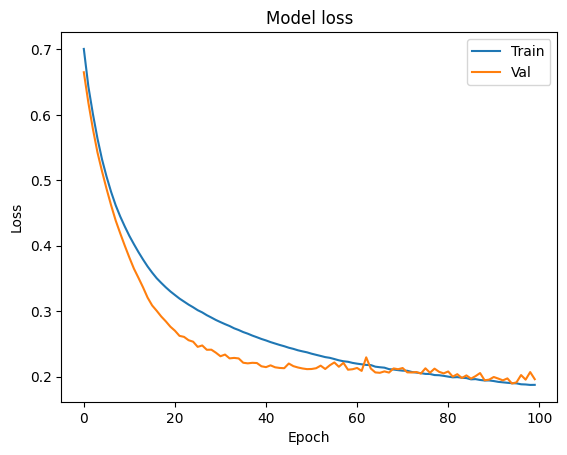

In [ ]:
# plotting model loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

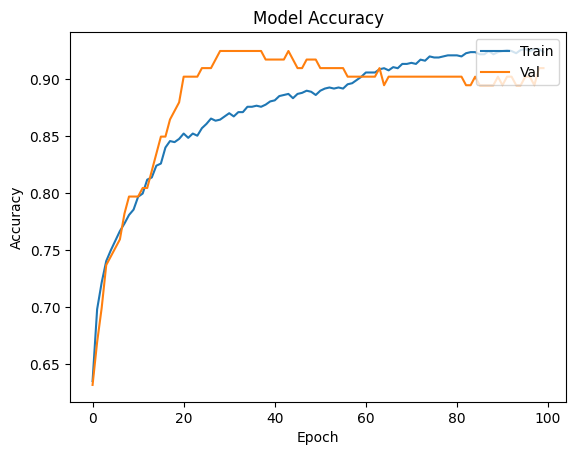

In [ ]:
# plotting accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Dengan mengganti optimizer menjadi SGD dan learning rate dicepatkan menjadi 0.01 dapat mengontrol overfit dari model. Walaupun hasil dari akurasi tidak akan sebagus dengan menggunakan optimizer dari Adam. Akurasi yang didapatkan adalah 92% dan untuk validasi 93%. Sedangkan pada saat di evaluasi dengan test 93%. 

Pada model ketiga ini juga terdapat pergantian jumlah neuron, tetapi jumlah hidden layer masih tetaplah sama.

Kesimpulan yang bisa didapatkan adalah perbedaan dari model nomor 1C adalah :
- Perbedaan jumlah neuron
  
  Pada perbedaan ini yang saya ganti dapat terlihat pada neuron yang awalanya hidden layer 1, 16 neuron menjadi 14 neuoron. Sedangkan untuk hidden layer 2, dari 16 neuron menjadi 18 neuron. 
- Perbedaan activasion function

  Pada perbedaana activasion function dapat terlihat pada hidden layer terakhir atau output yang mana pada awalnya tidak ada activation function ditambahkan dengan sigmoid activation function di layer terakhir. Sehingga dapat menambahkan akurasi performa
- Penggunaan optimizer

  Pada penggunaan optimzer yang dipilih adalah SGD dengan learning rate 0.01. Saya tidak memilih optimzer Adam karena adalam pada model yang tergolong simple cenderung overfit dapat dilihat dari spike loss yang dihasilkan dan lebih susah dikontrol. 
- Penyetelan batch size

  Pada model ini batch size yang saya gunakan 20 untuk mendapatkan hasil output optimal yaitu meningkat akurasi yang diberikan
- Pergantian epochs

  Pada model epoch yang saya gunakan 100 untuk melihat model dengan iterasi yang lebih lama dari awalnya 40. Saya tidak menambahkan lebih dari 100 karena dapat memungkinkan overfitting. 
- arsitektur 

  Pada model ini tetap menggunakan aristektur yang sama dari basenya yaitu dua hidden layer dengan input 8 dan output 2. 
- Batch mornalization

  Pada model ini saat digunkanan batch normalization akan terjadi spike di model loss sehingga saya menghapus pengunaan batch normalization dapaat dikarenakan arsitektur model yang sederhana. 

##### 1F. [LO 3, LO 4, 5 poin] Lakukan evaluasi unjuk kerja kedua arsitektur di atas pada test set dengan mencari nilai accuracy, precision, recall dan F1-Score. Dan berikan penjelasan mengenai hasilnya dengan rinci.

Dari sini akan membuat model predict untuk melihat hasil prediksi dan akan disimpkan ke variable

In [117]:
# model base
y_pred_base = FirstModel.predict(x_test)
# modified model
y_pred_mod = Model_1C.predict(x_test)

5/5 [==============================] - 0s 2ms/step


In [156]:
# import libray for classification danconfusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

Melihat confussion table

In [149]:
# confussion table
print("Base Model :")
print(classification_report(y_test, y_pred_base.argmax(axis=1)))
print()
print("Modified Model :")
print(classification_report(y_test, y_pred_mod.argmax(axis=1)))

Base Model :
              precision    recall  f1-score   support

           0       0.26      0.24      0.25        54
           1       0.51      0.53      0.52        79

    accuracy                           0.41       133
   macro avg       0.38      0.39      0.38       133
weighted avg       0.41      0.41      0.41       133


Modified Model :
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        54
           1       0.99      0.90      0.94        79

    accuracy                           0.93       133
   macro avg       0.93      0.94      0.93       133
weighted avg       0.94      0.93      0.93       133



Define fuction buat confussion matrix 

In [150]:
def con_plot(y_test,y_pred,label):
  conf = confusion_matrix(y_test,y_pred)
  sns.heatmap(conf,annot=True)
  plt.ylabel('Prediction',fontsize=13)
  plt.xlabel('Actual',fontsize=13)
  plt.title(label,fontsize=17)
  plt.show()

Model base counfison matrix :

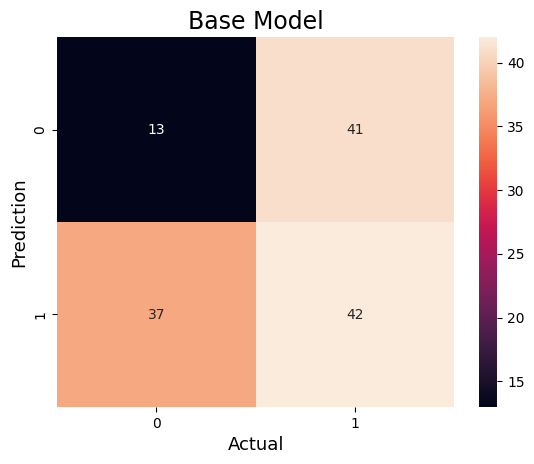

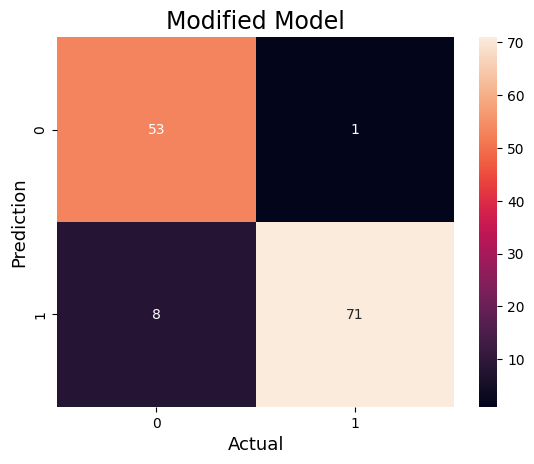

In [155]:
# plotting confusion matrix
con_plot(y_test, y_pred_base.argmax(axis=1),"Base Model")
con_plot(y_test, y_pred_mod.argmax(axis=1),"Modified Model")

Dari sini dapat dilihat dengan modifed model dapat membuat prediksi lebih baik lagi dapat dilihat dari perbedaan confussion model antara modifed dengan base. Base memiliki value yang bukan true value (0,0 atau 1,1) banyak, yiatu 37 dan 41. Sedangkan dengan modified model di dapatkan value yang bukan true value lebih dikit, yaitu 8 dan 1.

JIki di lihat dari classification report di dapatkan base model mendapatkan rata" 50% sendangkan untuk modified mendapatkan rata" di 90%.

##### 1E. [LO 1, LO 2, LO 3, LO 4 5 poin] Buatlah video presentasi yang menjelaskan arsitektur yang dibangun untuk mengklasifikasikan sebuah klaim ini.

Link video penjelasan : https://drive.google.com/file/d/1G-ZBwxn9a5N80Gyjbx0GPnfen0zVq7pc/view?usp=sharing 